# 2.2 - K-Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("dataset_phishing.csv", sep = ",")

In [3]:
n = int(input("Ingrese las filas que desea ver"))
data.head(n)

Ingrese las filas que desea ver6


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing


In [4]:
X_selected = data.iloc[:, [1, -2]].values.astype(float)
y = data.iloc[:, -1].values

In [5]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [6]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [7]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2)**2))
    return distance

In [8]:
knn_model = KNN(k=3)
knn_model.fit(X_train_selected, y_train)

In [9]:
predictions = knn_model.predict(X_test_selected)

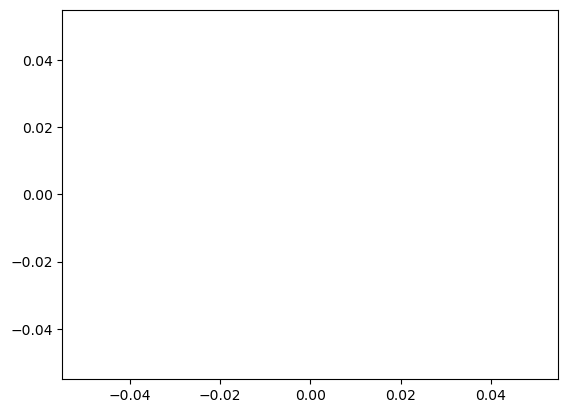

In [10]:
for i, label in enumerate(np.unique(predictions)):
    plt.scatter(X_test_selected[predictions == label, 0], X_test_selected[predictions == label, 1], label=label, marker=f'${i}$', edgecolor='k')

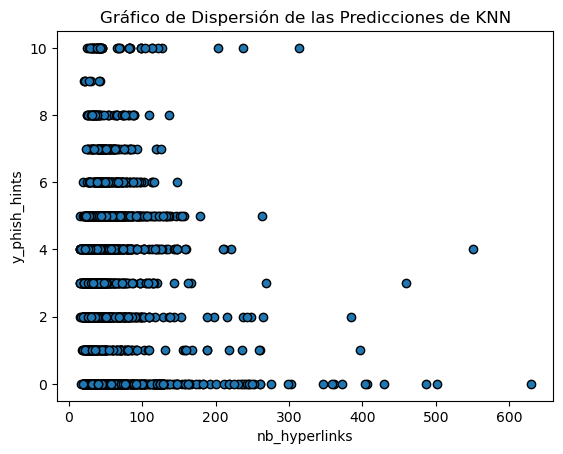

In [11]:
plt.scatter(X_test_selected[:, 0], X_test_selected[:, 1], marker='o', edgecolor='k')
plt.xlabel('nb_hyperlinks')
plt.ylabel('y_phish_hints')
plt.title('Gráfico de Dispersión de las Predicciones de KNN')
plt.show()


In [12]:
accuracy = np.mean(predictions == y_test)
print(f'Precisión: {accuracy}')

Precisión: 0.7987751531058618


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [14]:
data = pd.read_csv("dataset_phishing.csv", sep=",")

In [15]:
X_selected = data.iloc[:, [1, -2]].values.astype(float)
y = data.iloc[:, -1].values


In [16]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [17]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_selected, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
predictions = knn_model.predict(X_test_selected)


In [19]:
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión: {accuracy}')


Precisión: 0.8022747156605424


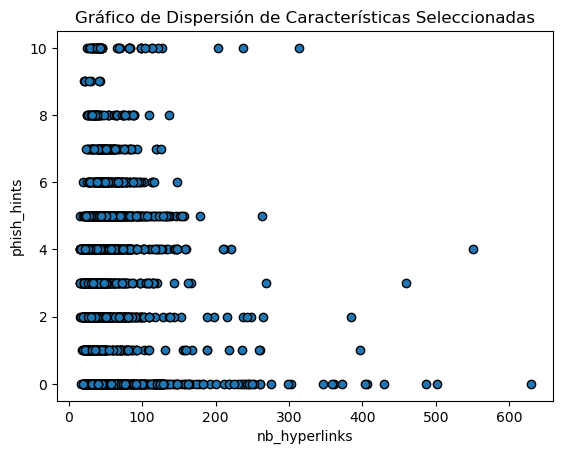

In [23]:
# Graficar el conjunto de datos y las predicciones
plt.scatter(X_test_selected[:, 0], X_test_selected[:, 1], marker='o', edgecolor='k')
plt.xlabel('nb_hyperlinks')
plt.ylabel('phish_hints')
plt.title('Gráfico de Dispersión de Características Seleccionadas')
plt.show()
